In [5]:
%matplotlib inline
import numpy as np
import pandas as pd
import datetime as dt
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure

df = pd.read_csv("/content/sample_data/coffee_clean.csv", encoding='latin-1')


# convert date to numeric value for regression
df['review_date'] = pd.to_datetime(df['review_date'], format='%m/%d/%Y')
df['review_date'] = df['review_date'].map(dt.datetime.toordinal)

df = df.dropna()
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1891 entries, 0 to 2199
Data columns (total 32 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   rating                      1891 non-null   int64  
 1   roaster                     1891 non-null   object 
 2   name                        1891 non-null   object 
 3   region_africa_arabia        1891 non-null   int64  
 4   region_caribbean            1891 non-null   int64  
 5   region_central_america      1891 non-null   int64  
 6   region_hawaii               1891 non-null   int64  
 7   region_asia_pacific         1891 non-null   int64  
 8   region_south_america        1891 non-null   int64  
 9   type_espresso               1891 non-null   int64  
 10  type_organic                1891 non-null   int64  
 11  type_fair_trade             1891 non-null   int64  
 12  type_decaffeinated          1891 non-null   int64  
 13  type_best_value             1891 

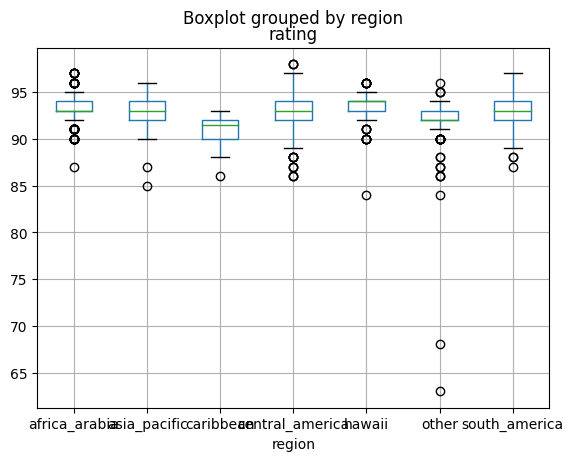

In [6]:
# 'region_africa_arabia', 'region_caribbean', 'region_central_america', 'region_hawaii', 'region_asia_pacific', 'region_south_america'
boxplot = df.boxplot(by = 'region', column=['rating'])

In [7]:
from sklearn.model_selection import train_test_split




# split data frame into features and targets
df_target = df['rating']
df_features = df.drop(columns=['rating', 'roaster', 'name', 'roast', 'region'])

# create test and train sets
X = df_features
y = df_target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)

In [8]:
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge

lasso = Lasso()
lasso.fit(X_train, y_train)
y_pred = lasso.predict(X_test)
print("Lasso score on test data: ", lasso.score(X_test, y_test))

Lasso score on test data:  0.020742399263934064


In [10]:
# standardize and compute eigen values to determine corelations
from sklearn.preprocessing import StandardScaler

numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
numeric_columns = df.select_dtypes(include=numerics)


scaler = StandardScaler(copy=True, with_std=True)
scaler_model = scaler.fit(numeric_columns)

df_standardized = pd.DataFrame(scaler_model.transform(numeric_columns), columns=list(numeric_columns.columns))

display(df_standardized)

import numpy as np
pd.set_option('display.max_rows', 50)
pd.set_option('display.max_columns', 50)
df4_cov = df_standardized.cov()
print(df4_cov)

eigen_values, eigen_vectors = np.linalg.eig(df4_cov)
print(eigen_values)

,rating,region_africa_arabia,region_caribbean,region_central_america,region_hawaii,region_asia_pacific,region_south_america,type_espresso,type_organic,type_fair_trade,type_decaffeinated,type_best_value,type_pod_capsule,type_blend,type_estate,type_peaberry,type_barrel_aged,type_aged,review_date,aroma,acid,body,flavor,aftertaste,value_standard,blind_assessment_sentiment,notes_sentiment,bottom_line_sentiment
0,1.044809,-0.847992,-0.072913,-0.533523,-0.264906,-0.22999,2.178926,-0.039862,-0.286021,-0.179458,-0.069153,-0.410764,0.0,-0.278375,1.292635,-0.126966,-0.039862,-0.060955,1.469103,0.333582,0.828318,0.722542,0.063858,1.748554,-0.002310,0.303058,0.993497,0.520972
1,1.044809,-0.847992,-0.072913,-0.533523,-0.264906,-0.22999,2.178926,-0.039862,-0.286021,-0.179458,-0.069153,-0.410764,0.0,-0.278375,1.292635,-0.126966,-0.039862,-0.060955,1.469103,0.333582,0.828318,0.722542,0.063858,1.748554,0.514362,-0.130114,0.496773,-0.703858
2,0.505286,1.179256,-0.072913,-0.533523,-0.264906,-0.22999,-0.458942,-0.039862,-0.286021,-0.179458,-0.069153,2.434490,0.0,-0.278375,1.292635,-0.126966,-0.039862,-0.060955,1.469103,0.333582,0.828318,0.722542,0.063858,-0.199894,-0.174534,-1.080408,0.318155,-1.266272
3,-0.034237,-0.847992,-0.072913,-0.533523,-0.264906,-0.22999,2.178926,-0.039862,-0.286021,-0.179458,-0.069153,-0.410764,0.0,-0.278375,1.292635,-0.126966,-0.039862,-0.060955,1.469103,0.333582,0.828318,-1.237754,0.063858,-0.199894,-0.174534,-0.873895,-0.269968,0.299366
4,0.505286,-0.847992,-0.072913,1.874334,-0.264906,-0.22999,-0.458942,-0.039862,-0.286021,-0.179458,-0.069153,-0.410764,0.0,-0.278375,1.292635,-0.126966,-0.039862,-0.060955,1.469103,0.333582,0.828318,0.722542,0.063858,-0.199894,0.985446,-0.247642,-0.486221,0.368568
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1886,-0.034237,-0.847992,-0.072913,1.874334,-0.264906,-0.22999,-0.458942,-0.039862,-0.286021,-0.179458,-0.069153,-0.410764,0.0,-0.278375,1.292635,-0.126966,-0.039862,-0.060955,-2.051213,0.333582,0.828318,-1.237754,0.063858,-0.199894,0.043279,0.006721,0.400594,0.574173
1887,0.505286,1.179256,-0.072913,-0.533523,-0.264906,-0.22999,-0.458942,-0.039862,-0.286021,-0.179458,-0.069153,-0.410764,0.0,-0.278375,-0.773614,-0.126966,-0.039862,-0.060955,-2.051213,0.333582,0.828318,0.722542,0.063858,-0.199894,-0.082375,-1.666366,0.787997,0.598974
1888,1.584331,-0.847992,-0.072913,1.874334,-0.264906,-0.22999,-0.458942,-0.039862,-0.286021,-0.179458,-0.069153,-0.410764,0.0,-0.278375,1.292635,-0.126966,-0.039862,-0.060955,-2.051213,2.531504,0.828318,0.722542,0.063858,1.748554,0.174979,0.706849,0.901202,0.731377
1889,1.044809,-0.847992,-0.072913,1.874334,-0.264906,-0.22999,-0.458942,-0.039862,-0.286021,-0.179458,-0.069153,-0.410764,0.0,-0.278375,1.292635,-0.126966,-0.039862,-0.060955,-2.051213,0.333582,0.828318,0.722542,0.063858,1.748554,-0.128945,0.495300,1.096247,0.262165


                              rating  region_africa_arabia  region_caribbean  \
rating                      1.000529              0.164238         -0.096960   
region_africa_arabia        0.164238              1.000529         -0.061862   
region_caribbean           -0.096960             -0.061862          1.000529   
region_central_america     -0.032023             -0.437166         -0.038921   
region_hawaii               0.047433             -0.216091         -0.019325   
region_asia_pacific        -0.020947             -0.185312         -0.016778   
region_south_america       -0.004426             -0.375238         -0.033481   
type_espresso               0.041670             -0.033821         -0.002908   
type_organic               -0.125325             -0.023597          0.089504   
type_fair_trade            -0.068540             -0.010362         -0.013092   
type_decaffeinated         -0.106062             -0.011917         -0.005045   
type_best_value             0.048469    